In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
df.shape

(7728394, 46)

In [13]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(3554549, 46)

In [21]:
df['Start_Time'] = df['Start_Time'].str.replace(r'\.000000000', '', regex=True)
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [22]:
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year

**EDA**

In [25]:
import folium
from folium.plugins import HeatMap

In [30]:
plt.style.use('dark_background')

Accidents by Time of Day

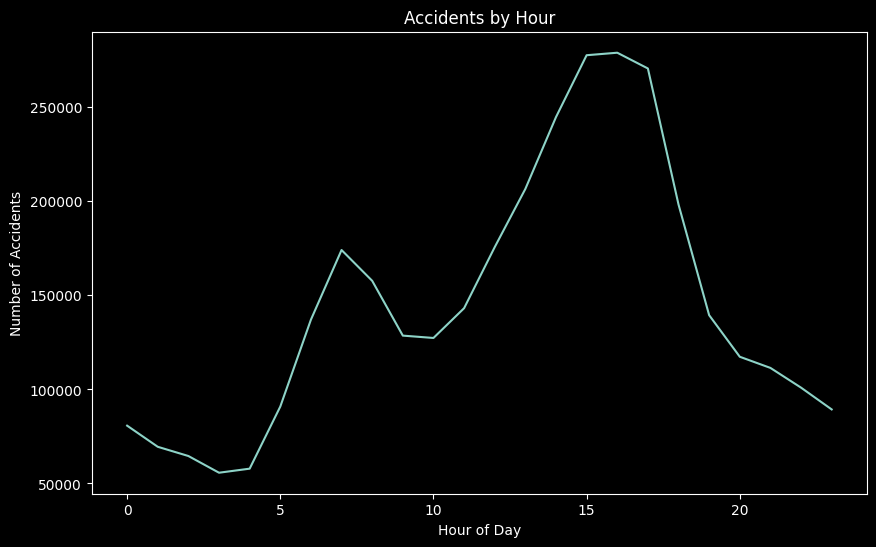

In [31]:
# Plot hourly accident distribution
hourly_accidents = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

Accidents by Weather Conditions

C:\Users\zainz\AppData\Local\Temp\ipykernel_116124\3336837386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.values, y=weather_counts.index, palette="viridis")


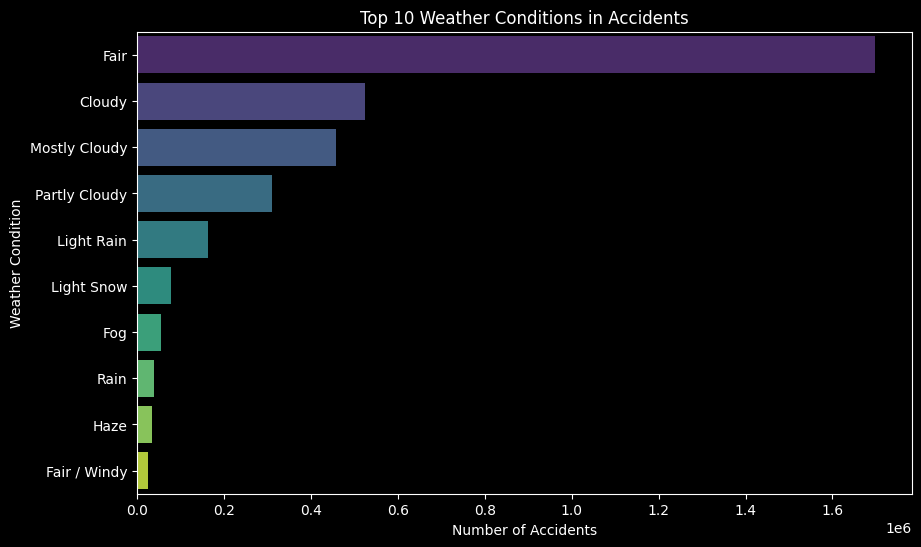

In [32]:
# Top 10 weather conditions
weather_counts = df['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.values, y=weather_counts.index, palette="viridis")
plt.title('Top 10 Weather Conditions in Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

Severity by Weather

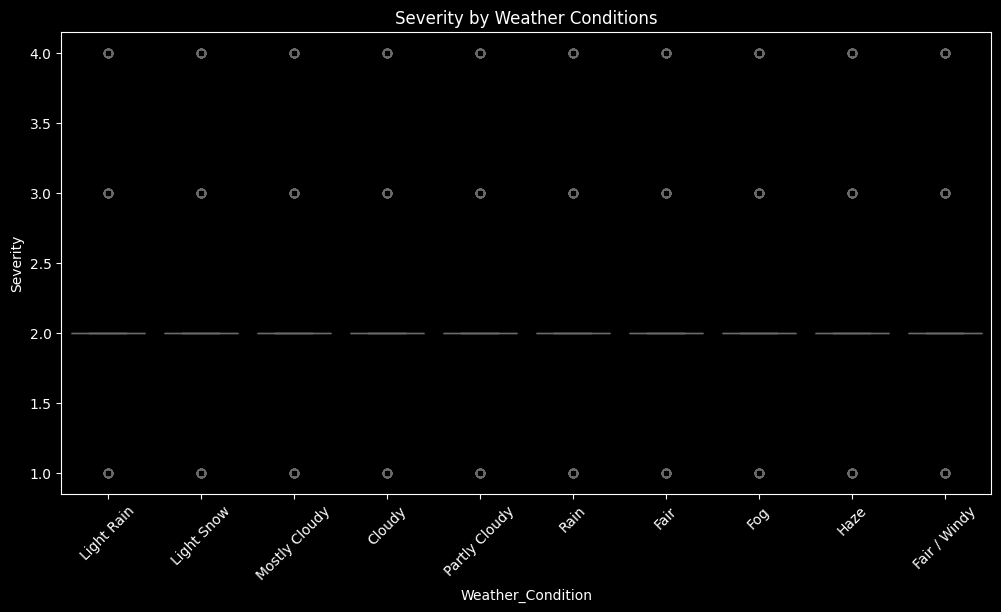

In [35]:
# Severity distribution for top weather conditions
top_weather = df[df['Weather_Condition'].isin(weather_counts.index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Weather_Condition', y='Severity', data=top_weather)
plt.xticks(rotation=45)
plt.title('Severity by Weather Conditions')
plt.show()

**Geographic Hotspot Visualization**

Accident Heatmap

In [36]:
# Create a base map
base_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add accident locations to heatmap
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(base_map)

# Save and display map
base_map.save('accident_heatmap.html')

Clustered Accident Map

In [46]:
import folium
from folium.plugins import MarkerCluster

# Sample a smaller subset for faster plotting
sample_data = df.sample(n=10000, random_state=42)  # Adjust 'n' as needed

# Initialize the map
cluster_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add markers using MarkerCluster
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in sample_data.iterrows():
    folium.Marker([row['Start_Lat'], row['Start_Lng']]).add_to(marker_cluster)

# Save the map
cluster_map.save('optimized_accident_cluster_map.html')

**Advanced Analysis**

Accidents by Day of the Week

C:\Users\zainz\AppData\Local\Temp\ipykernel_116124\461449190.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues")


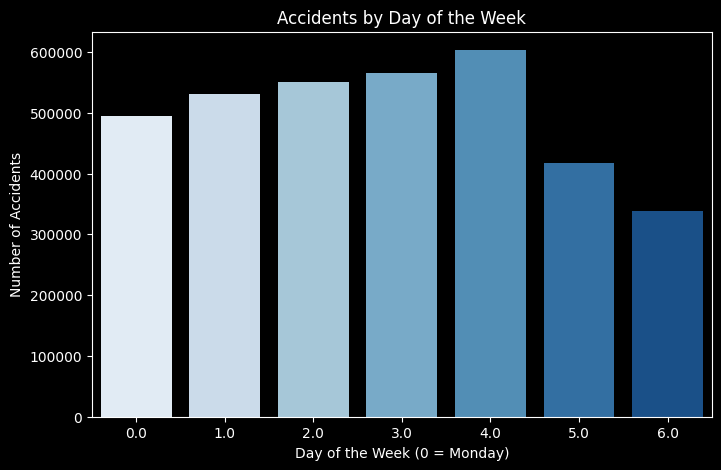

In [44]:
# Accident counts by day of the week
day_counts = df['Day_of_Week'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues")
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday)')
plt.ylabel('Number of Accidents')
plt.show()

Impact of Visibility

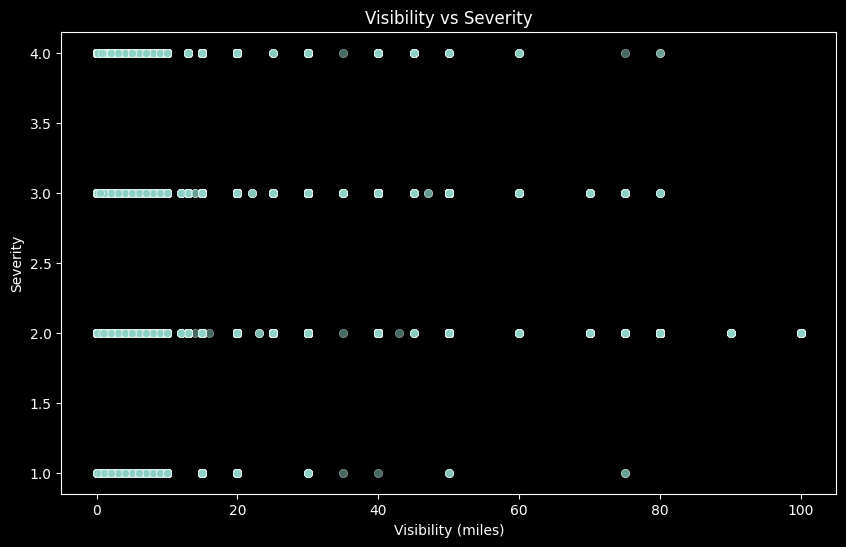

In [45]:
# Scatter plot for visibility vs severity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Visibility(mi)', y='Severity', data=df, alpha=0.5)
plt.title('Visibility vs Severity')
plt.xlabel('Visibility (miles)')
plt.ylabel('Severity')
plt.show()

### **US Accidents Data Analysis**

#### **Objective**
Analyze traffic accident data (2016–2023) to identify:
- Temporal patterns (hour, day, month).
- Weather and road conditions affecting accidents.
- Geographic hotspots of accidents.

#### **Key Steps**
1. **Data Cleaning**:
   - Removed rows with missing values.
   - Converted timestamps and extracted components (hour, day, month).
2. **Exploratory Data Analysis**:
   - Identified peak accident times.
   - Examined severity under different weather conditions.
3. **Visualization**:
   - Created heatmaps and cluster maps for accident hotspots.
   - Generated line plots, bar charts, and scatterplots for patterns.
4. **Insights**:
   - Highlighted critical times, locations, and contributing factors.

#### **Outcome**
Derive actionable insights to improve road safety and mitigate accidents.